In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [2]:
# Load data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_y = df['diagnosis']

df.head(5)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


(2136, 3216, 3)


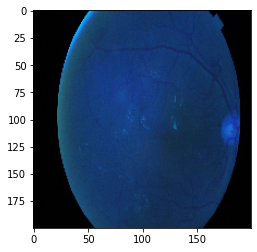

In [30]:
# Imagen de ejemplo
img = cv2.imread('train_images/000c1434d8d7.png')
print(img.shape)
img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_CUBIC)
plt.imshow(img)

In [57]:
# Numero de datos, width y lenght de imgs, y largo de los arrays
n_data = 500
size_pic = 128

# Get imagenes para x ya aplanadas y entre 0-1
TrainData = []
for f, i in df[:n_data].values:
    img = cv2.imread('train_images/{}.png'.format(f))
    img = cv2.resize(img, (size_pic, size_pic), interpolation = cv2.INTER_CUBIC)
#     print(img.shape)
    TrainData.append(img)
#     x.append(img.flatten()/255)

# Get imagenes para x_test ya aplanadas y entre 0-1
ValData = []
for f, i in df[n_data:n_data+50].values:
    img = cv2.imread('train_images/{}.png'.format(f))
    img = cv2.resize(img, (size_pic, size_pic), interpolation = cv2.INTER_CUBIC)
    ValData.append(img)
#     x_test.append(img.flatten()/255)

# Get imagenes para x_test ya aplanadas y entre 0-1
TestData = []
for f, i in df[n_data+250:n_data+500].values:
    img = cv2.imread('train_images/{}.png'.format(f))
    img = cv2.resize(img, (size_pic, size_pic), interpolation = cv2.INTER_CUBIC)
    TestData.append(img)
#     x_test.append(img.flatten()/255)

In [58]:
labelData=[]
for i in range(1000):
    if df_y[i]==0:
        labelData.append([1,0,0,0,0,0])
    if df_y[i]==1:
        labelData.append([0,1,0,0,0,0])
    if df_y[i]==2:
        labelData.append([0,0,1,0,0,0])
    if df_y[i]==3:
        labelData.append([0,0,0,1,0,0])
    if df_y[i]==4:
        labelData.append([0,0,0,0,1,0])
    if df_y[i]==5:
        labelData.append([0,0,0,0,0,1])
LabelTrainData=[]
LabelTrainData=labelData[0:500]
print(len(LabelTrainData))
LabelValData=[]
LabelValData=labelData[500:750]
print(len(LabelValData))
LabelTestData=[]
LabelTestData=labelData[750:1000]
print(len(LabelTestData))
# print(pd)
# df_y
# print(len(x))
# print(len(p))
# m = np.array(p)
# print(m.shape)
# n = np.array(x)
# print(n.shape)

500
250
250


Se pasan los datos a matrices

In [59]:
#Train Data
TrainData=np.array(TrainData)
LabelTrainData=np.array(LabelTrainData)
print(TrainData.shape)
print(LabelTrainData.shape)
#Val Data
ValData=np.array(ValData)
LabelValData=np.array(LabelValData)
print(ValData.shape)
print(LabelValData.shape)
#Test Data
TestData=np.array(TestData)
LabelTestData=np.array(LabelTestData)
print(TestData.shape)
print(LabelTestData.shape)

(500, 128, 128, 3)
(500, 6)
(50, 128, 128, 3)
(250, 6)
(250, 128, 128, 3)
(250, 6)


In [60]:
x=tf.keras.backend.placeholder(shape=[None,128])
y=tf.keras.backend.placeholder(shape=[None,6])
print(x)
print(y)
# x = tf.placeholder(tf.float32, shape=[None, 784]) 
# y = tf.placeholder(tf.float32, shape=[None, 10])

Tensor("Placeholder_6:0", shape=(None, 128), dtype=float32)
Tensor("Placeholder_7:0", shape=(None, 6), dtype=float32)


In [66]:
w1=tf.Variable( tf.compat.v1.truncated_normal(shape=[128,512]))
b1=tf.Variable(tf.zeros([512]))
w2=tf.Variable( tf.compat.v1.truncated_normal(shape=[512,6]))
b2=tf.Variable(tf.zeros([6]))

In [62]:
def NN(x):
    z1=tf.matmul(x,w1)+b1
    a1=tf.nn.relu(z1)
    z2=tf.matmul(a1,w2)+b2
    return z2

In [63]:
y_ = NN(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_, labels = y))


In [64]:
train_pred = tf.nn.softmax(y_) 

ValData = ValData.astype('float32')
y_valid = NN(ValData)
valid_pred = tf.nn.softmax(y_valid)

InvalidArgumentError: In[0] mismatch In[1] shape: 3 vs. 128: [50,128,128,3] [128,512] 0 0 [Op:BatchMatMulV2]